In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [1]:
# Replace with your actual file path
file_path = 'C:/Users/thaplood2/Desktop/Testing/100206_jc.xlsx'

# Read the Excel file, assuming the first column has ROI names and the rest are correlation values
df_correlations = pd.read_excel(file_path, sheet_name = 1)

# Extract ROI names (assuming they're in the first column) and correlation data
roi_names = df_correlations.iloc[:, 0].astype(int).tolist()  # ROI names (first column)
correlation_data = df_correlations.iloc[:, 1:]  # All other columns contain correlation values

# Print output for verification
print("ROI Names:", roi_names[:23])  # Display first 10 ROI names as a sample
print("Correlation Data (First 5 Rows):\n", correlation_data.head())


NameError: name 'pd' is not defined

In [3]:
# Define a threshold for including edges (optional, set to 0.5 as an example)
threshold = 0.5

# Create an empty graph
G = nx.Graph()

print("Graph initialized and threshold set to", threshold)


Graph initialized and threshold set to 0.5


In [4]:
# Number of ROIs
num_rois = len(roi_names)

# Print the correlation matrix for verification (first 5 rows and 5 columns as a sample)
print(" Correlation Matrix (First 5x5 Subset)")
print(correlation_data.iloc[:5, :5])

# Loop through the correlation matrix and add edges to the graph
for i in range(num_rois):
    for j in range(i + 1, num_rois):  # Loop through the upper triangle to avoid duplicates
        correlation_value = correlation_data.iloc[i, j]  # Get the correlation between ROI i and ROI j
        
        # Add an edge only if the correlation value is above the threshold
        if pd.notna(correlation_value) and correlation_value > threshold:
            G.add_edge(roi_names[i], roi_names[j], weight=correlation_value)

# Output the resulting graph info
print(f" Edges added to the graph based on correlation values (Threshold {threshold})")
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

 Correlation Matrix (First 5x5 Subset)
          1         2         3         4         5
0  0.622503  0.626535  0.629904  0.624834  0.626585
1  1.216797  1.220537  1.224618  1.227098  1.222314
2  1.036040  1.066612  1.072488  1.072809  1.073019
3  0.853037  0.893098  0.897510  0.898131  0.891595
4  0.749871  0.737369  0.742612  0.727760  0.737382
 Edges added to the graph based on correlation values (Threshold 0.5)
Graph has 23 nodes and 241 edges


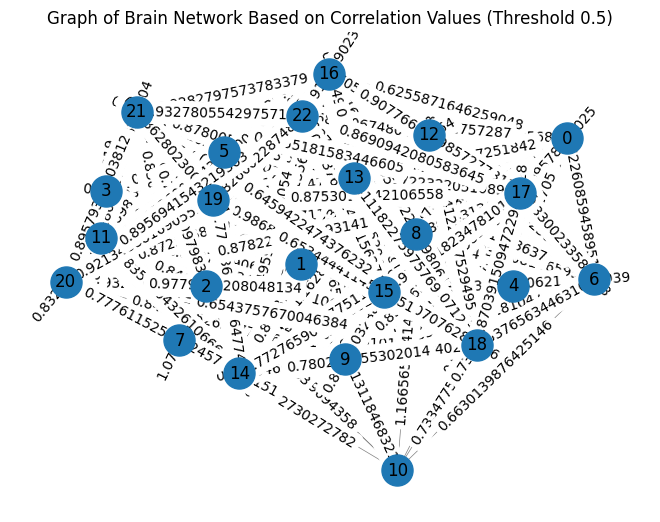

In [5]:
# Create a layout for visualization (spring layout for a neat appearance)

# Set a random seed for reproducibility
seed = 42

pos = nx.spring_layout(G, seed=seed)

# Draw the graph with node labels, node size, and edge width proportional to the correlation weights
nx.draw(G, pos, with_labels=True, node_size=500, edge_color='gray', width=0.5)

# Optionally, display correlation values as edge labels (for clarity)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display the graph
plt.title(f'Graph of Brain Network Based on Correlation Values (Threshold {threshold})')
plt.show()



Modularity of the graph: 0.0140


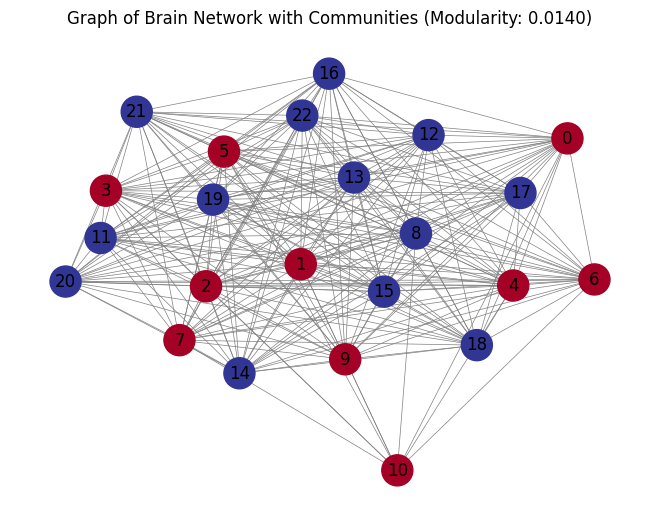

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain  # Louvain community detection

# Assuming the graph 'G' has already been created in previous steps

# Step 6: Perform Louvain community detection
partition = community_louvain.best_partition(G)

# Calculate modularity
modularity = community_louvain.modularity(partition, G)

print(f"Modularity of the graph: {modularity:.4f}")

# Optional: Visualize the graph with community colors
pos = nx.spring_layout(G, seed=42)  # Use fixed seed for consistent layout
nx.draw(G, pos, with_labels=True, node_size=500, node_color=[partition[node] for node in G.nodes()],
        cmap=plt.cm.RdYlBu, edge_color='gray', width=0.5)

# Display the modularity on the plot
plt.title(f'Graph of Brain Network with Communities (Modularity: {modularity:.4f})')
plt.show()
